In [1]:
import neat
import numpy as np
import pathlib

In [2]:
config_dir = pathlib.Path("./experiment_configs/")
config_path = pathlib.Path(config_dir, 'prospect-theory-simple')

In [3]:
config_path

PosixPath('experiment_configs/prospect-theory-simple')

In [4]:
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet,
                     neat.DefaultStagnation, config_path)

In [5]:
def eval_genome(genome, config, initial_satiation):
    genome.fitness = initial_satiation
    minimum_threshold = 10

    # risky choice
    mu_risky, sigma_risky = 3, 5
    # safe choice
    mu_safe, sigma_safe = 2, 1

    # make decision
    # output = net.activate((1, minimum_threshold, genome.fitness, mu_risky, sigma_risky, mu_safe, sigma_safe))
    net = neat.nn.FeedForwardNetwork.create(genome, config)
    # make decision
    output = net.activate((1, genome.fitness))
    # sample reward from the decision distribution
    if output[0] > 0.5:
        reward = np.random.default_rng().normal(mu_risky, sigma_risky, 1)[0]
    else:
        reward = np.random.default_rng().normal(mu_safe, sigma_safe, 1)[0]

    # gain the reward
    genome.fitness += reward
            
    # if fitness falls below minimum threshold, the genome automatically "dies"
    if (genome.fitness < minimum_threshold):
        genome.fitness = 0
    else:
        # consume survival threshold 
        # genome.fitness -= minimum_threshold
        # survival bonus (helps to not overreward lucky winners)
        genome.fitness = 1
        # pass

In [6]:
# fitness function for foraging decision task
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        # reward from the environment
        mu_env, sigma_env = 10, 5
        env_reward = np.random.default_rng().normal(mu_env, sigma_env, 1)[0]

        eval_genome(genome, config, env_reward)

In [7]:
# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

# Run for up to 250 generations.
winner = p.run(eval_genomes, 250)


 ****** Running generation 0 ****** 

Population's average fitness: 0.63000 stdev: 0.48280
Best fitness: 1.00000 - size: (1, 2) - species 1 - id 2
Average adjusted fitness: 0.630
Mean genetic distance 1.341, standard deviation 0.498
Population of 300 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   300      1.0    0.630     0
Total extinctions: 0
Generation time: 0.231 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65333 stdev: 0.47591
Best fitness: 1.00000 - size: (1, 2) - species 1 - id 2
Average adjusted fitness: 0.653
Mean genetic distance 1.939, standard deviation 0.845
Population of 300 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   285      1.0    0.653     1
     2    0     2       --       --     0
     3    0    13       --       --     0
Total extinctions: 0
Generation time: 0.413 sec (0.322 average)

 **

Population's average fitness: 0.68106 stdev: 0.46606
Best fitness: 1.00000 - size: (1, 1) - species 2 - id 4466
Average adjusted fitness: 0.682
Mean genetic distance 2.335, standard deviation 0.724
Population of 301 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    96      1.0    0.612    15
     2   14    47      1.0    0.742    12
     3   14   103      1.0    0.774    13
     4    6    55      1.0    0.600     5
Total extinctions: 0
Generation time: 0.312 sec (0.273 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64120 stdev: 0.47965
Best fitness: 1.00000 - size: (2, 1) - species 2 - id 4519
Average adjusted fitness: 0.639
Mean genetic distance 2.323, standard deviation 0.718
Population of 300 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    95      1.0    0.646    16
     2   15    48      1.0    0.596    13


Population's average fitness: 0.63087 stdev: 0.48257
Best fitness: 1.00000 - size: (4, 5) - species 5 - id 7926
Average adjusted fitness: 0.636
Mean genetic distance 2.412, standard deviation 0.683
Population of 298 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   27    47      1.0    0.525    27
     2   26    21      1.0    0.690    24
     3   26    79      1.0    0.679    25
     4   18    26      1.0    0.619    17
     5   11    27      1.0    0.692    10
     6    9    75      1.0    0.556     8
     7    9    23      1.0    0.692     8
Total extinctions: 0
Generation time: 0.290 sec (0.258 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60067 stdev: 0.48976
Best fitness: 1.00000 - size: (3, 3) - species 5 - id 8020
Average adjusted fitness: 0.605
Mean genetic distance 2.451, standard deviation 0.681
Population of 299 members in 7 species:
   ID   age  size  fitness  adj fit  stag


Mean genetic distance 2.374, standard deviation 0.624
Population of 300 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   39    28      1.0    0.636    39
     2   38    74      1.0    0.583    36
     3   38    87      1.0    0.730    37
     4   30    42      1.0    0.511    29
     5   23    33      1.0    0.562    22
     6   21    18      1.0    0.658    20
     7   21    18      1.0    0.643    20
Total extinctions: 0
Generation time: 0.311 sec (0.304 average)
Saving checkpoint to neat-checkpoint-39

 ****** Running generation 40 ****** 

Population's average fitness: 0.67000 stdev: 0.47021
Best fitness: 1.00000 - size: (3, 1) - species 7 - id 10699
Average adjusted fitness: 0.664
Mean genetic distance 2.316, standard deviation 0.668
Population of 300 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   40    35      1.0    0.714    40
     2   39    52  

Mean genetic distance 2.746, standard deviation 1.090
Population of 300 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   51    37      1.0    0.697    51
     2   50    34      1.0    0.609    48
     3   50    74      1.0    0.597    49
     4   42    33      1.0    0.660    41
     5   35    46      1.0    0.611    34
     6   33    21      1.0    0.630    32
     7   33    12      1.0    0.595    32
     8    4    35      1.0    0.739     3
     9    0     8       --       --     0
Total extinctions: 0
Generation time: 0.308 sec (0.339 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.67333 stdev: 0.46899
Best fitness: 1.00000 - size: (2, 1) - species 8 - id 14733
Average adjusted fitness: 0.682
Mean genetic distance 2.974, standard deviation 1.122
Population of 300 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   52    4

Mean genetic distance 3.066, standard deviation 1.232
Population of 300 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   61    34      1.0    0.805    61
     2   60    28      1.0    0.750    58
     3   60    62      1.0    0.635    59
     4   52    18      1.0    0.714    51
     5   45    16      1.0    0.667    44
     6   43    21      1.0    0.615    42
     7   43    20      1.0    0.696    42
     8   14    52      1.0    0.582    13
     9   10    20      1.0    0.600     9
    10    9    15      1.0    0.733     8
    11    9    14      1.0    0.643     8
Total extinctions: 0
Generation time: 0.323 sec (0.340 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66000 stdev: 0.47371
Best fitness: 1.00000 - size: (2, 2) - species 11 - id 17922
Average adjusted fitness: 0.658
Mean genetic distance 3.082, standard deviation 1.181
Population of 301 members in 11 species:
   ID   age  s

Mean genetic distance 3.198, standard deviation 1.416
Population of 301 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   70    17      1.0    0.565    70
     2   69    27      1.0    0.654    67
     3   69    49      1.0    0.642    68
     4   61    28      1.0    0.679    60
     5   54    19      1.0    0.583    53
     6   52    36      1.0    0.806    51
     7   52    13      1.0    0.538    51
     8   23    39      1.0    0.608    22
     9   19    21      1.0    0.818    18
    10   18    15      1.0    0.833    17
    11   18    15      1.0    0.778    17
    12    4    22      1.0    0.500     2
Total extinctions: 0
Generation time: 0.384 sec (0.388 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.68439 stdev: 0.46476
Best fitness: 1.00000 - size: (1, 1) - species 5 - id 20522
Average adjusted fitness: 0.676
Mean genetic distance 3.154, standard deviation 1.473
Population of 

Population's average fitness: 0.65667 stdev: 0.47482
Best fitness: 1.00000 - size: (2, 0) - species 10 - id 22535
Average adjusted fitness: 0.668
Mean genetic distance 3.150, standard deviation 1.496
Population of 300 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   79    23      1.0    0.824    79
     2   78    19      1.0    0.632    76
     3   78    59      1.0    0.661    77
     4   70    23      0.0    0.387    69
     5   63    24      1.0    0.783    62
     6   61    34      1.0    0.676    60
     7   61    14      1.0    0.615    60
     8   32    36      1.0    0.706    31
     9   28    13      1.0    0.526    27
    10   27    18      1.0    0.800    26
    11   27    19      1.0    0.750    26
    12   13    18      1.0    0.652    11
Total extinctions: 0
Generation time: 0.278 sec (0.368 average)
Saving checkpoint to neat-checkpoint-79

 ****** Running generation 80 ****** 

Population's average fitnes

Population's average fitness: 0.70234 stdev: 0.45723
Best fitness: 1.00000 - size: (5, 7) - species 12 - id 25294
Average adjusted fitness: 0.719
Mean genetic distance 3.233, standard deviation 1.666
Population of 301 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   88    37      1.0    0.667    88
     2   87    21      1.0    0.619    85
     3   87    51      1.0    0.767    86
     4   79    14      1.0    0.704    78
     5   72    26      1.0    0.765    71
     6   70    22      1.0    0.500    69
     7   70    18      1.0    0.857    69
     8   41    26      1.0    0.688    40
     9   37    21      1.0    0.778    36
    10   36    10      1.0    0.917    35
    11   36    34      1.0    0.588    35
    12   22    21      1.0    0.778    20
Total extinctions: 0
Generation time: 0.220 sec (0.357 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.71096 stdev: 0.45331
Best fitness: 

Population's average fitness: 0.68000 stdev: 0.46648
Best fitness: 1.00000 - size: (3, 2) - species 10 - id 27573
Average adjusted fitness: 0.694
Mean genetic distance 3.428, standard deviation 2.023
Population of 301 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   97    23      1.0    0.667    97
     2   96    28      1.0    0.667    94
     3   96    65      1.0    0.667    95
     4   88    18      1.0    0.650    87
     5   81    20      1.0    0.737    80
     6   79    31      1.0    0.600    78
     7   79    11      1.0    0.923    78
     8   50    24      1.0    0.619    49
     9   46    21      1.0    0.870    45
    10   45    18      1.0    0.692    44
    11   45    20      1.0    0.560    44
    12   31    22      1.0    0.680    29
Total extinctions: 0
Generation time: 0.339 sec (0.330 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.67774 stdev: 0.46734
Best fitness: 

Mean genetic distance 3.567, standard deviation 2.166
Population of 298 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     4   97    29      1.0    0.559    96
     5   90    25      1.0    0.560    89
     6   88    75      1.0    0.716    87
     7   88    23      1.0    0.581    87
     8   59    39      1.0    0.581    58
     9   55    33      1.0    0.846    54
    10   54    19      1.0    0.722    53
    11   54    25      1.0    0.514    53
    12   40    30      1.0    0.633    38
Total extinctions: 0
Generation time: 0.809 sec (0.350 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.69799 stdev: 0.45913
Best fitness: 1.00000 - size: (5, 5) - species 6 - id 30727
Average adjusted fitness: 0.679
Mean genetic distance 3.582, standard deviation 2.176
Population of 298 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     4   98    

Population's average fitness: 0.65781 stdev: 0.47444
Best fitness: 1.00000 - size: (1, 0) - species 9 - id 33805

Species 5 with 37 members is stagnated: removing it
Average adjusted fitness: 0.653
Mean genetic distance 3.730, standard deviation 2.122
Population of 300 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     6   99    84      1.0    0.716    98
     7   99    16      0.0    0.467    98
     8   70    34      1.0    0.609    69
     9   66    19      1.0    0.667    65
    10   65    26      1.0    0.680    64
    11   65    37      1.0    0.774    64
    12   51    29      1.0    0.741    49
    13   10    28      1.0    0.500     9
    14    7    27      1.0    0.722     6
Total extinctions: 0
Generation time: 0.200 sec (0.265 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.65000 stdev: 0.47697
Best fitness: 1.00000 - size: (3, 0) - species 7 - id 34123
Average adjusted fitness: 0.

Mean genetic distance 3.481, standard deviation 2.114
Population of 302 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   80    23      1.0    0.675    79
     9   76    28      1.0    0.500    75
    10   75    27      1.0    0.636    74
    11   75    21      1.0    0.609    74
    12   61    18      0.0    0.474    59
    13   20    45      1.0    0.688    19
    14   17    29      1.0    0.724    16
    15    8    42      1.0    0.694     7
    16    8    28      1.0    0.667     7
    17    7    41      1.0    0.730     6
Total extinctions: 0
Generation time: 0.334 sec (0.333 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.66556 stdev: 0.47179
Best fitness: 1.00000 - size: (1, 0) - species 12 - id 37076
Average adjusted fitness: 0.670
Mean genetic distance 3.615, standard deviation 2.214
Population of 301 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  

Mean genetic distance 3.825, standard deviation 2.312
Population of 298 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8   90    13      1.0    0.600    89
     9   86    37      1.0    0.564    85
    10   85    20      1.0    0.625    84
    11   85    18      1.0    0.611    84
    12   71    21      1.0    0.577    69
    13   30    36      1.0    0.550    29
    14   27    23      1.0    0.565    26
    15   18    61      1.0    0.655    17
    16   18    18      1.0    0.667    17
    17   17    32      1.0    0.647    16
    18    3    19      1.0    0.636     1
Total extinctions: 0
Generation time: 0.271 sec (0.345 average)

 ****** Running generation 138 ****** 

Population's average fitness: 0.64765 stdev: 0.47770
Best fitness: 1.00000 - size: (1, 2) - species 18 - id 39417
Average adjusted fitness: 0.665
Mean genetic distance 3.857, standard deviation 2.267
Population of 300 members in 11 species:
   ID   age  

Mean genetic distance 3.687, standard deviation 2.284
Population of 297 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     8  100    27      0.0    0.481    99
     9   96    21      1.0    0.545    95
    10   95    15      1.0    0.684    94
    11   95    24      1.0    0.577    94
    12   81    25      1.0    0.577    79
    13   40    34      1.0    0.692    39
    14   37    15      1.0    0.667    36
    15   28    39      1.0    0.659    27
    16   28    31      1.0    0.562    27
    17   27    38      1.0    0.611    26
    18   13    28      1.0    0.759    11
Total extinctions: 0
Generation time: 0.228 sec (0.413 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.69024 stdev: 0.46240
Best fitness: 1.00000 - size: (1, 0) - species 9 - id 43009

Species 8 with 27 members is stagnated: removing it
Average adjusted fitness: 0.692
Mean genetic distance 3.479, standard deviation 2.159
Po

Population's average fitness: 0.63000 stdev: 0.48280
Best fitness: 1.00000 - size: (1, 0) - species 18 - id 45693
Average adjusted fitness: 0.630
Mean genetic distance 3.716, standard deviation 2.570
Population of 300 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    12   91    19      0.0    0.478    89
    13   50    54      1.0    0.569    49
    14   47    31      1.0    0.571    46
    15   38    44      1.0    0.633    37
    16   38    34      1.0    0.806    37
    17   37    39      1.0    0.571    36
    18   23    24      1.0    0.692    21
    19    8    26      1.0    0.708     7
    20    7    29      1.0    0.643     6
Total extinctions: 0
Generation time: 0.259 sec (0.300 average)

 ****** Running generation 158 ****** 

Population's average fitness: 0.64333 stdev: 0.47902
Best fitness: 1.00000 - size: (1, 0) - species 12 - id 45763
Average adjusted fitness: 0.636
Mean genetic distance 4.061, standard deviation

Population's average fitness: 0.69333 stdev: 0.46111
Best fitness: 1.00000 - size: (2, 1) - species 12 - id 48595
Average adjusted fitness: 0.719
Mean genetic distance 4.576, standard deviation 3.155
Population of 299 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    12  101    22      1.0    0.652    99
    13   60    39      1.0    0.568    59
    14   57    18      1.0    0.609    56
    15   48    38      1.0    0.688    47
    16   48    33      1.0    0.794    47
    17   47    30      1.0    0.727    46
    18   33    13      1.0    0.650    31
    19   18    28      1.0    0.818    17
    20   17    20      1.0    0.688    16
    21    7    19      1.0    0.667     6
    22    4    24      1.0    0.769     3
    23    1    15      1.0    1.000     0
Total extinctions: 0
Generation time: 0.367 sec (0.327 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.65217 stdev: 0.47628
Best fitness:

Population's average fitness: 0.60596 stdev: 0.48864
Best fitness: 1.00000 - size: (2, 1) - species 23 - id 51189
Average adjusted fitness: 0.586
Mean genetic distance 4.903, standard deviation 3.235
Population of 302 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   69    47      1.0    0.622    68
    14   66    23      1.0    0.611    65
    15   57    36      1.0    0.633    56
    16   57    21      1.0    0.600    56
    17   56    26      1.0    0.560    55
    18   42    21      1.0    0.840    40
    19   27    14      0.0    0.474    26
    20   26    18      1.0    0.667    25
    21   16    15      0.0    0.375    15
    22   13    25      1.0    0.800    12
    23   10    14      1.0    0.500     9
    24    6    14      1.0    0.562     5
    25    3    14      0.0    0.400     2
    26    2    14      1.0    0.556     1
Total extinctions: 0
Generation time: 0.353 sec (0.332 average)

 ****** Running genera

Population's average fitness: 0.68667 stdev: 0.46385
Best fitness: 1.00000 - size: (1, 1) - species 14 - id 53523
Average adjusted fitness: 0.685
Mean genetic distance 5.142, standard deviation 3.616
Population of 299 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   78    36      1.0    0.828    77
    14   75    22      1.0    0.706    74
    15   66    27      1.0    0.730    65
    16   66    16      1.0    0.750    65
    17   65    18      1.0    0.609    64
    18   51    29      1.0    0.600    49
    19   36    31      1.0    0.667    35
    20   35    18      1.0    0.632    34
    21   25    19      1.0    0.700    24
    22   22    18      1.0    0.750    21
    23   19    22      1.0    0.571    18
    24   15     8      1.0    0.615    14
    25   12    20      1.0    0.696    11
    26   11    15      1.0    0.737    10
Total extinctions: 0
Generation time: 0.335 sec (0.328 average)

 ****** Running genera

Mean genetic distance 5.726, standard deviation 4.027
Population of 299 members in 15 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   86    36      1.0    0.741    85
    14   83    14      1.0    0.550    82
    15   74    41      1.0    0.750    73
    16   74    20      1.0    0.682    73
    17   73     9      1.0    0.583    72
    18   59    31      1.0    0.786    57
    19   44    22      1.0    0.762    43
    20   43    24      1.0    0.905    42
    21   33    13      1.0    0.533    32
    22   30    18      1.0    0.579    29
    23   27    16      1.0    0.625    26
    24   23    14      1.0    0.688    22
    25   20    16      0.0    0.357    19
    26   19    18      0.0    0.476    18
    27    1     7      1.0    0.500     0
Total extinctions: 0
Generation time: 0.613 sec (0.453 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.63545 stdev: 0.48130
Best fitness: 1.00000 - size: (1,

Mean genetic distance 5.441, standard deviation 4.008
Population of 302 members in 18 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    13   94    29      1.0    0.618    93
    14   91    19      1.0    0.500    90
    15   82    18      1.0    0.706    81
    16   82    20      1.0    0.583    81
    17   81    17      1.0    0.667    80
    18   67    30      1.0    0.583    65
    19   52     8      1.0    0.562    51
    20   51    15      1.0    0.562    50
    21   41    10      1.0    0.714    40
    22   38     6      1.0    0.857    37
    23   35    17      1.0    0.565    34
    24   31    11      1.0    0.600    30
    25   28    20      1.0    0.696    27
    26   27    16      1.0    0.571    26
    27    9    15      1.0    0.588     8
    28    7    10      1.0    0.667     6
    29    3    16      1.0    0.667     2
    30    3    25      1.0    0.692     1
Total extinctions: 0
Generation time: 0.479 sec (0.428 average)



Population's average fitness: 0.66667 stdev: 0.47140
Best fitness: 1.00000 - size: (1, 0) - species 25 - id 60134

Species 13 with 31 members is stagnated: removing it
Average adjusted fitness: 0.652
Mean genetic distance 5.738, standard deviation 3.924
Population of 302 members in 17 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    14   98    15      1.0    0.600    97
    15   89    12      1.0    0.625    88
    16   89    18      1.0    0.615    88
    17   88    17      1.0    0.611    87
    18   74    34      1.0    0.630    72
    19   59    19      1.0    0.667    58
    20   58    12      0.0    0.400    57
    21   48    13      0.0    0.455    47
    22   45    14      1.0    0.692    44
    23   42    19      1.0    0.727    41
    24   38    15      1.0    0.625    37
    25   35    13      1.0    0.846    34
    26   34    11      1.0    0.667    33
    27   16    21      1.0    0.800    15
    28   14    15      0.0    0.4

Population's average fitness: 0.61589 stdev: 0.48638
Best fitness: 1.00000 - size: (1, 0) - species 26 - id 60989
Average adjusted fitness: 0.619
Mean genetic distance 6.114, standard deviation 4.154
Population of 299 members in 17 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    15   96    21      1.0    0.600    95
    16   96    19      1.0    0.700    95
    17   95    23      0.0    0.464    94
    18   81    33      1.0    0.698    79
    19   66    20      1.0    0.600    65
    20   65    11      1.0    0.600    64
    21   55    12      1.0    0.625    54
    22   52    14      0.0    0.353    51
    23   49    16      1.0    0.588    48
    24   45    12      1.0    0.700    44
    25   42    14      1.0    0.714    41
    26   41    15      1.0    0.692    40
    27   23    17      1.0    0.737    22
    28   21    16      1.0    0.667    20
    29   17    12      1.0    0.583    16
    30   17    25      1.0    0.548    15
   

Mean genetic distance 6.796, standard deviation 4.722
Population of 302 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    18   89    45      1.0    0.618    87
    19   74    18      1.0    0.667    73
    20   73    20      1.0    0.857    72
    21   63     1      1.0    1.000    62
    22   60    13      1.0    0.783    59
    23   57    20      1.0    0.700    56
    24   53    27      1.0    0.500    52
    25   50    22      1.0    0.520    49
    26   49    23      1.0    0.583    48
    27   31    36      1.0    0.600    30
    28   29    19      1.0    0.722    28
    29   25     2      1.0    0.615    24
    30   25    37      1.0    0.625    23
    31   12    19      1.0    0.571    11
Total extinctions: 0
Generation time: 0.332 sec (0.366 average)

 ****** Running generation 224 ****** 

Population's average fitness: 0.65563 stdev: 0.47516
Best fitness: 1.00000 - size: (1, 0) - species 25 - id 63713
Average adjust

Population's average fitness: 0.63907 stdev: 0.48027
Best fitness: 1.00000 - size: (1, 2) - species 31 - id 66277
Average adjusted fitness: 0.619
Mean genetic distance 6.392, standard deviation 4.517
Population of 302 members in 15 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    18   98    41      1.0    0.694    96
    19   83    14      1.0    0.562    82
    20   82     7      1.0    0.500    81
    21   72    15      1.0    0.611    71
    22   69    19      1.0    0.722    68
    23   66    21      1.0    0.533    65
    24   62    23      1.0    0.720    61
    25   59    39      1.0    0.667    58
    26   58    16      1.0    0.591    57
    27   40    20      1.0    0.529    39
    28   38    23      1.0    0.682    37
    29   34    10      0.0    0.455    33
    30   34    29      1.0    0.690    32
    31   21    13      1.0    0.706    20
    32    0    12       --       --     0
Total extinctions: 0
Generation time: 0.443 s


 ****** Running generation 240 ****** 

Population's average fitness: 0.62626 stdev: 0.48380
Best fitness: 1.00000 - size: (1, 0) - species 27 - id 68110
Average adjusted fitness: 0.634
Mean genetic distance 7.082, standard deviation 4.847
Population of 297 members in 16 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    19   91    14      1.0    0.739    90
    20   90    18      1.0    0.500    89
    21   80    17      1.0    0.733    79
    22   77    16      0.0    0.294    76
    23   74    11      0.0    0.421    73
    24   70    13      1.0    0.600    69
    25   67    41      1.0    0.620    66
    26   66    18      1.0    0.650    65
    27   48    18      1.0    0.818    47
    28   46    21      1.0    0.750    45
    29   42    11      1.0    0.538    41
    30   42    38      1.0    0.556    40
    31   29    13      1.0    0.571    28
    32    8    20      1.0    0.889     7
    33    3    17      1.0    0.667     2
    

Mean genetic distance 6.073, standard deviation 4.024
Population of 301 members in 17 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    19   99    15      1.0    0.588    98
    20   98    27      1.0    0.500    97
    21   88    15      1.0    0.615    87
    22   85     6      1.0    0.571    84
    23   82    17      1.0    0.533    81
    24   78    11      1.0    0.688    77
    25   75    47      1.0    0.675    74
    26   74     6      1.0    0.727    73
    27   56    13      1.0    0.533    55
    28   54    18      1.0    0.636    53
    29   50    19      1.0    0.588    49
    30   50    30      1.0    0.607    48
    31   37    11      1.0    0.615    36
    32   16     3      1.0    0.720    15
    33   11    23      1.0    0.583    10
    34   10    14      1.0    0.833     9
    35    5    26      1.0    0.556     4
Total extinctions: 0
Generation time: 0.338 sec (0.337 average)

 ****** Running generation 249 ****** 

Po

In [8]:
import matplotlib.pyplot as plt

def plot_stats(statistics, ylog=False, view=False, filename='avg_fitness.svg'):
    """ Plots the population's average and best fitness. """
    if plt is None:
        warnings.warn("This display is not available due to a missing optional dependency (matplotlib)")
        return

    generation = range(len(statistics.most_fit_genomes))
    best_fitness = [c.fitness for c in statistics.most_fit_genomes]
    avg_fitness = np.array(statistics.get_fitness_mean())
    stdev_fitness = np.array(statistics.get_fitness_stdev())

    plt.plot(generation, avg_fitness, 'b-', label="average")
    #plt.plot(generation, avg_fitness - stdev_fitness, 'g-.', label="-1 sd")
    #plt.plot(generation, avg_fitness + stdev_fitness, 'g-.', label="+1 sd")
    plt.plot(generation, best_fitness, 'r-', label="best")


    plt.title("Population's average and best fitness")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.grid()
    plt.legend(loc="best")
    if ylog:
        plt.gca().set_yscale('symlog')

    plt.savefig(filename)
    if view:
        plt.show()

    plt.close()

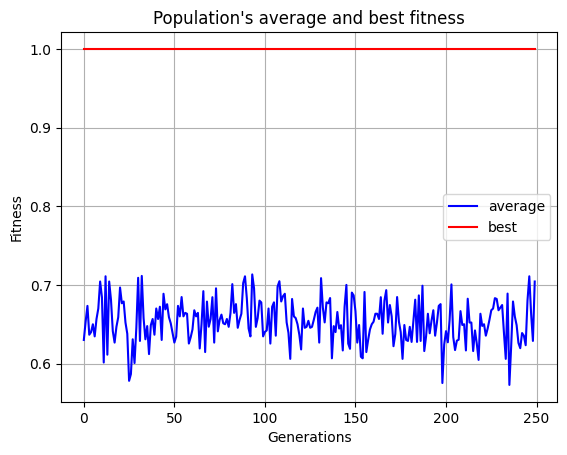

In [9]:
plot_stats(stats, ylog=False, view=True)

In [10]:
# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


Best genome:
Key: 2
Fitness: 1
Nodes:
	0 DefaultNodeGene(key=0, bias=0.5623275360786131, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=0.7901281417898871, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=1.1480556321752193, enabled=True)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import viridis as colormap
from matplotlib.ticker import LinearLocator

# Now we want to graph the NN's output and probability of survival
# We will use 2 plots
# In the first plot the Y-axis will plot the NN's output
# In the second plot the Y-axis will plot the probability of survival
# X-axis the reference point, which is the reward given by the environment

In [12]:
x_axis = np.linspace(-10, 20, 101)

In [13]:
def activate_wrapper(initial_satiation):
    return winner_net.activate((1, initial_satiation))[0]

vfunc = np.vectorize(activate_wrapper)
nn_output = vfunc(x_axis)

Text(0.5, 1.0, "Winner's output as a function of satiety")

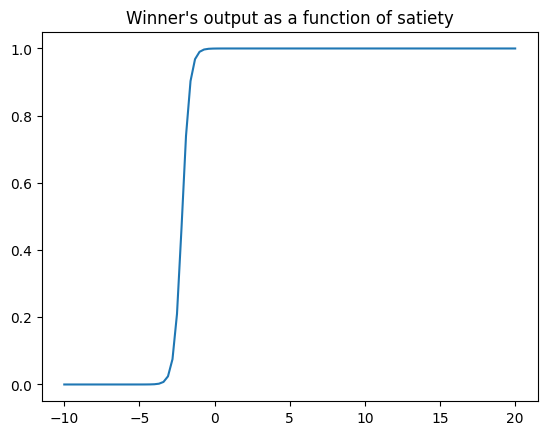

In [14]:
fig, ax1 = plt.subplots()
ax1.plot(x_axis, nn_output)
ax1.set_title("Winner's output as a function of satiety")